In [1]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import numpy as np
X = np.array([[2, 3], [1, 1], [4, 5]])  # Features: size, color
y = np.array([1, -1, 1])  # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


Answers

1. It is classified as non-fiction
2. There are 8 errors
3. It tells me that the model found weights that separate the training data perfectly which means the data set is separated linear,once the separating line is found, mistakes will no longer occur.

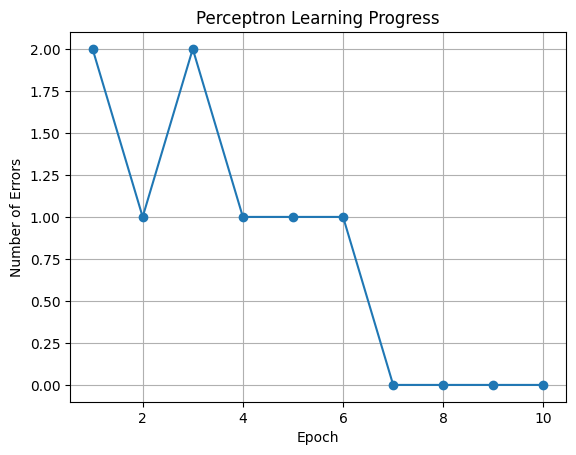

In [3]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

Observations


*   error change over 10 epochs: 2-1-2-1-1-1-0-0-0-0
*   It stops at 7

Answers

1. I think its because the perceptron updates one sample at a time. An update that fixes one sample can temporarily break  another, so the count can oscillate until a stable separating boundary is found.
2. It means that there are no more errors.The current weights classify all training points correctly.



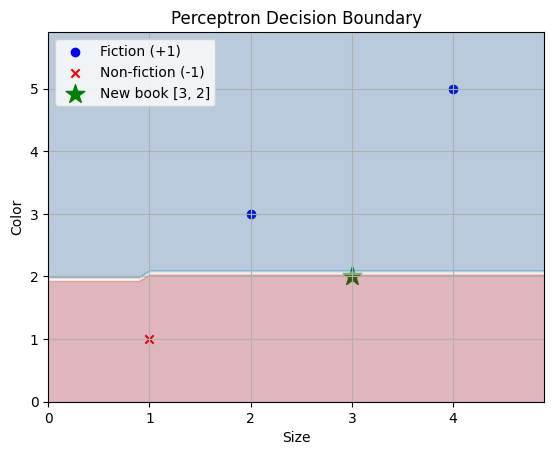

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Observations


*   The new book is predicted -1
*   It does separate them correctly after convergence

Answers

1. The new book gets the prediction of -1 because it falls on the non-fiction side of the learned line
2. It separates them by a straight line in(size, color) space, the points on the other side are labeled +1 and -1 on the other side.
3. I'm expecting it to lie on the positive side.

Exersice 4

Setting 1
*   The prediction for [3,2] -1
*   The error list [2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Setting 2


*   The prediction for [3,2] -1
*   The error list [2,1,2,1,1]

Answers

1. I think faster learning can converge faster if you allow enough epochs, but with only 5 it hadn't reach 0.
2. More epochs give more chances to fix mistakes, with n_iter=5 we didn't get to 0, with n-iter=20 we did.
3. No these two settings both give -1, because both either converge to or are close maybe they are close to a boundary that places[3,2] on the -1






In [5]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 (Setosa) and 1 (Versicolor)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


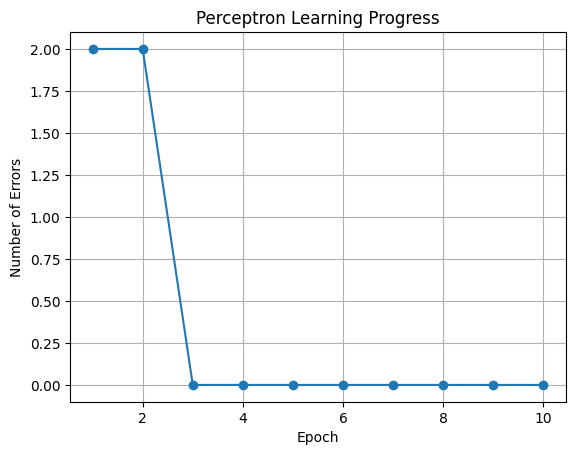

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

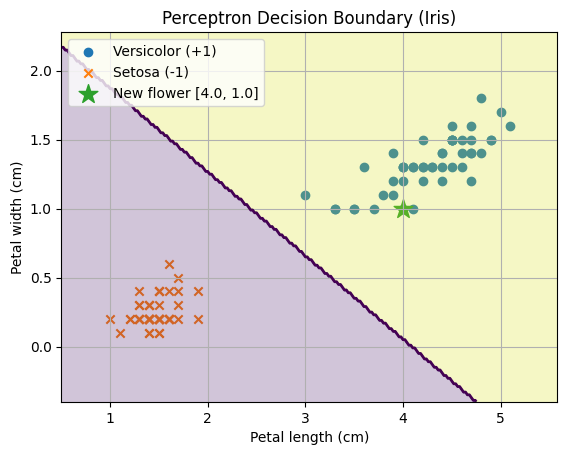

In [7]:
# Scatter the two classes
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Versicolor (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='x', label='Setosa (-1)')
plt.scatter([4.0], [1.0], marker='*', s=200, label='New flower [4.0, 1.0]')

# Make a grid and classify each grid point
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

# Filled background and contour line
plt.contourf(xx1, xx2, Z, alpha=0.25)
plt.contour(xx1, xx2, Z, levels=[0], linewidths=2)

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Perceptron Decision Boundary (Iris)')
plt.legend()
plt.grid(True)
plt.show()


Record


*   The prediction for [4.0, 1.0]
*   The error list [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
*   Observations from the plot

Answers

1. The output is -1 for Setosa and +1 for Versicolor. For [4.0, 1.0], you should get +1 Versicolor.
2. Yes within a few epochs, because Setosa vs. Versicolor are linearly separable using petal length/width. Once a separating line is found, training errors drop to 0.
3. Both are linearly separable, but Iris has many points with a clear margin between Setosa and Versicolor on these features, so separation is also straightforward.




In [8]:
import numpy as np
X = np.array([[2, 3], [1, 1], [4, 5], [3, 4]])
y = np.array([1, -1, 1, 1])  # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


Observation

*   Prediction for [3, 2]: -1
*   Errors: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]

Answers

1. No it's still -1. The new point keeps the set linearly separable, and the learned boundary still places [3,2] on the -1 side.
2. It still reaches 0 by epoch 7, confirming separability.
3. Yes, it can. Different initial weights may yield different separating lines on the same separable data, which can change how fast errors drop and occasionally change the prediction for a new point near the boundary.The training labels remain perfectly classified once a separator is found, but the exact separator can vary, hence different outcomes for unseen points.

